# Lista 9 - Física Computacional

Aluna: Ylana Karolina Santos Lopes

In [70]:
from numpy import sin, cos, array, arange, pi, sqrt
import matplotlib.pyplot as plt

#### Problema 1: O pêndulo forçado

In [2]:

l = 10e-2 #m
c = 2 #s^-2
omega = 5 #s^-5
g = 9.81


In [3]:
def f(t, i):
    theta = i[0]
    dev = i[1]
    f0 = dev
    f_dev = ((-g*sin(theta))/l) + c*cos(theta)*sin(omega*t)
    return array([f0, f_dev], float)

def rk4(t, i):
    K1 = h*f(t,i)
    K2 = h*f(t + h/2, i + K1/2)
    K3 = h*f(t + h/2, i + K2/2) 
    K4 = h*f(t + h, i + K3)
    return i + (K1 + 2*K2 + 2*K3 + K4)/6

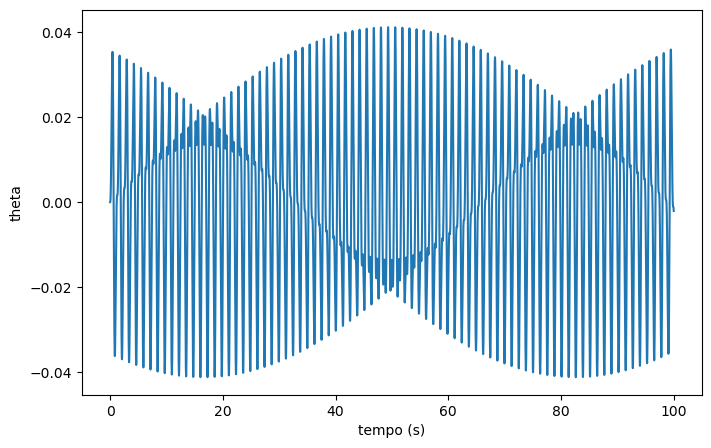

In [4]:
### a)
a = 0
b = 100
N = 100000
h = (b-a)/N
tempo = arange(a,b,h)
theta = []
z = []
r = array([0,0], float)

for t in tempo:
    theta.append(r[0])
    z.append(r[1])
    r = rk4(t, r)
    
plt.figure(figsize=(8,5))
plt.plot(tempo,theta)
plt.xlabel("tempo (s)")
plt.ylabel("theta")
plt.show()


In [21]:
### b) 
def f(t, i, omega):
    theta = i[0]
    dev = i[1]
    f0 = dev
    f_dev = ((-g*sin(theta))/l) + c*cos(theta)*sin(omega*t)
    return array([f0, f_dev], float)

def rk4(t, i,omega):
    K1 = h*f(t,i, omega)
    K2 = h*f(t + h/2, i + K1/2, omega)
    K3 = h*f(t + h/2, i + K2/2, omega) 
    K4 = h*f(t + h, i + K3, omega)
    return i + (K1 + 2*K2 + 2*K3 + K4)/6

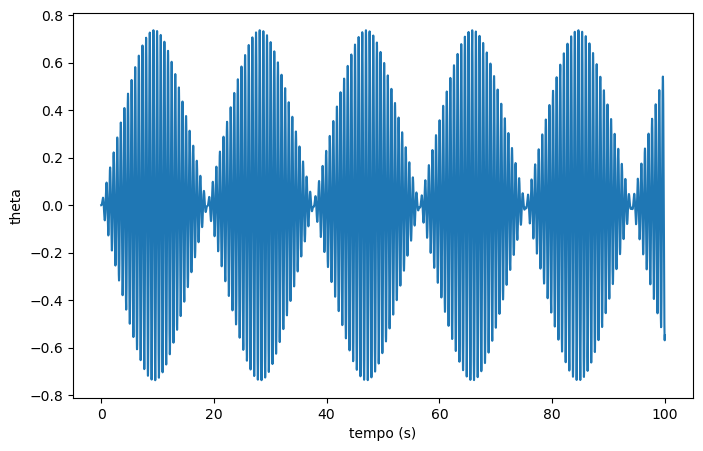

In [30]:
omega = [10]

a = 0
b = 100
N = 10000
h = (b-a)/N
tempo = arange(a,b,h)


for j in omega:
    theta = []
    z = []
    r = array([0,0], float)
    for i in tempo:
        theta.append(r[0])
        z.append(r[1])
        r = rk4(i, r, j)
        
        
plt.figure(figsize=(8,5))
plt.plot(tempo,theta)
plt.xlabel("tempo (s)")
plt.ylabel("theta")
plt.show()


### Problema 2: osciladores harmônicos e anarmônicos

In [31]:
## a)

w = 1
def f(t,r):
    x = r[0]
    z = r[1]
    fx = z
    fz = -x*(w**2)
    return array([fx,fz], float)

def rk4(t, r):
    K1 = h*f(t,r)
    K2 = h*f(t + h/2, r + K1/2)
    K3 = h*f(t + h/2, r + K2/2) 
    K4 = h*f(t + h, r + K3)
    return r + (K1 + 2*K2 + 2*K3 + K4)/6

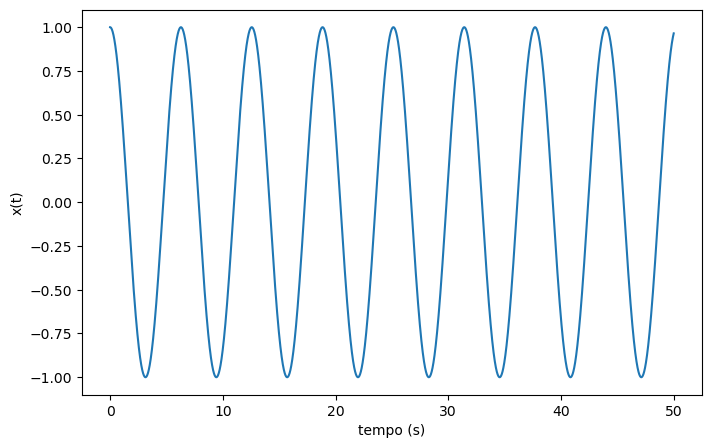

In [34]:
a, b = 0, 50
N = 100000
h = (b-a)/N
t = arange(a, b, h)
x = []
z = []
r = array([1, 0])

for i in t:
    x.append(r[0])
    z.append(r[1])
    r = rk4(i, r)
    
plt.figure(figsize=(8,5))
plt.plot(t,x)
plt.xlabel("tempo (s)")
plt.ylabel("x(t)")
plt.show()

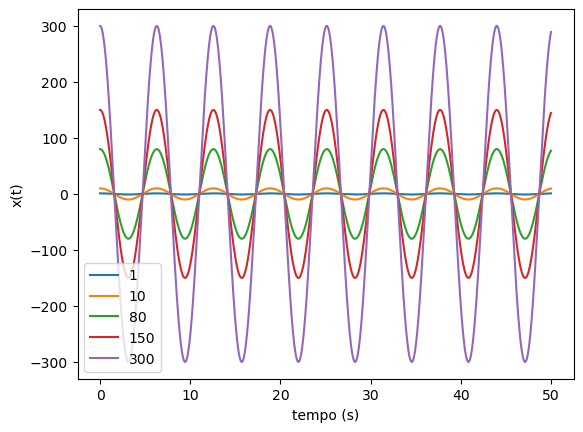

In [40]:
## b)

a, b = 0, 50
N = 10000
h = (b-a)/N
t = arange(a, b, h)
y = [1, 10, 80, 150,300]


for j in y:
    x, z = [], []
    r = array([j, 0])

    for i in t:
        x.append(r[0])
        z.append(r[1])
        r = rk4(i, r)
        
    plt.plot(t,x, label = j)
plt.xlabel("tempo (s)")
plt.ylabel("x(t)")
plt.legend()
plt.show()


In [45]:
## c)

def f(t, r):
    x, z = r[0], r[1]
    fx = z
    fz = -(x**3)*(w**2)
    return array([fx,fz], float)

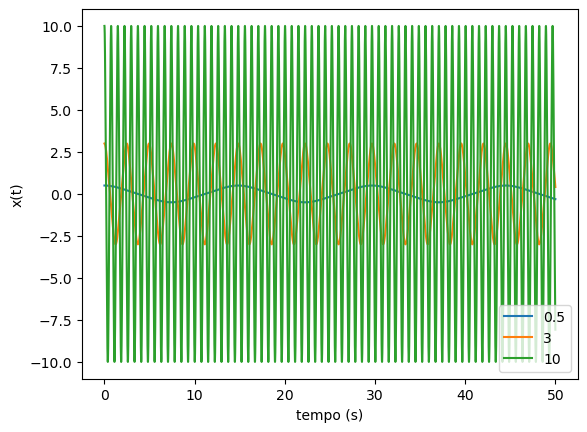

In [56]:
a, b = 0, 50
N = 10000
h = (b-a)/N
t = arange(a, b, h)
y = [0.5,3,10] ## parametros iniciais alterados mudam a frequência


for j in y:
    x, z = [], []
    r = array([j, 0])

    for i in t:
        x.append(r[0])
        z.append(r[1])
        r = rk4(i, r)
        
    plt.plot(t,x, label = j)
plt.xlabel("tempo (s)")
plt.ylabel("x(t)")
plt.legend()
plt.show()



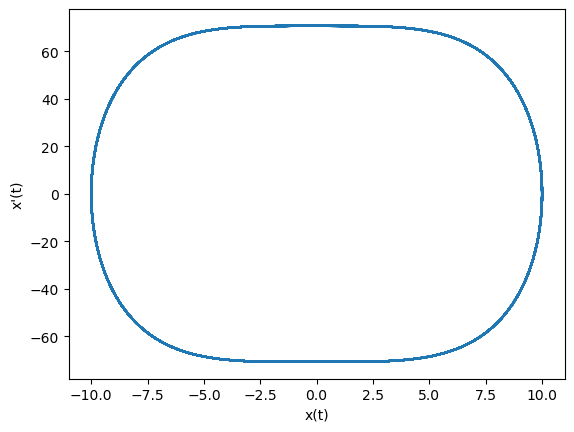

In [57]:
## d)
plt.plot(x,z)
plt.xlabel("x(t)")
plt.ylabel("x'(t)")
plt.show()

In [58]:
## e)
def f(t, r, mu):
    x, z = r[0], r[1]
    fx = z
    fz = mu*(1-x**2)*z - x*(w**2)
    return array([fx,fz], float)

def rk4(t, r, mu):
    K1 = h*f(t, r, mu)
    K2 = h*f(t + h/2, r + K1/2, mu)
    K3 = h*f(t + h/2, r + K2/2, mu) 
    K4 = h*f(t + h, r + K3, mu)
    return r + (K1 + 2*K2 + 2*K3 + K4)/6

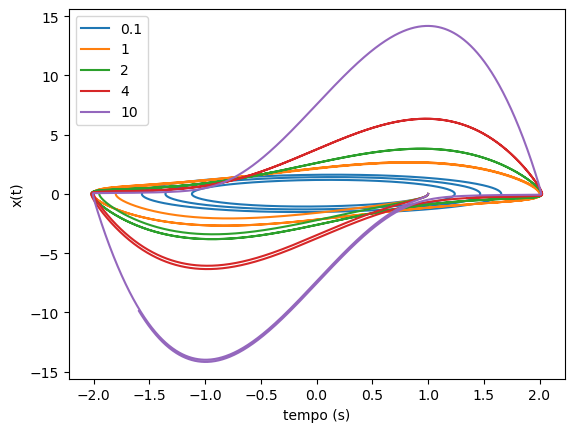

In [65]:
a, b = 0, 20
N = 50000
h = (b-a)/N
t = arange(a, b, h)
mu = [0.1,1, 2, 4,10]


for j in mu:
    x, z = [], []
    r = array([1, 0])

    for i in t:
        x.append(r[0])
        z.append(r[1])
        r = rk4(i, r, j)
        
    plt.plot(x,z, label = j)
plt.xlabel("tempo (s)")
plt.ylabel("x(t)")
plt.legend()
plt.show()

## mu = 1,2,4 + 0.1 e 10 porque queria ver como ficaria

### Problema 3: Trajetória com resistência do ar

#### a)
Para encontrar as equações, igualamos a força da resistencia do ar com $F = ma$
$$  \frac{1}{2}\pi R^2 \rho Cv^2 = ma $$

Isolamos a aceleração, de forma que encontramos:

$$ a =  \frac{\pi R^2 \rho Cv^2 }{2m} $$

Tendo isso, e sabendo que a aceleração é a segunda derivada da posição, pegamos a componente da aceleração na direção x (em que x' = derivada temporal) levando em conta a direção da aceleração (sinal):

$$ a_x =  - \frac{\pi R^2 \rho Cv^2 }{2m} x'\sqrt{x'^2 + y'^2} $$

e fazemos o mesmo para a direção y, mas considerando a aceleração da gravidade que atua na mesma direção da componente que estamos considerando:

$$ a_y = - g - \frac{\pi R^2 \rho Cv^2 }{2m} y'\sqrt{x'^2 + y'^2} $$

Assim encontramos as equações acima.

In [66]:
## b)
m = 1
R = 0.08
p = 1.22
C = 0.47
g = 9.81

def f(t, r):
    x, y, vx, vy = r[0], r[1], r[2], r[3]
    fx = vx
    fy = vy
    m2 = 2*m
    fvx = ((-(pi*(R**2)*p*C))/m2)*vx*sqrt(vx**2 + vy**2)
    fvy = -g-(((pi*(R**2)*p*C)/m2)*vy*sqrt(vx**2 + vy**2))
    return array([fx, fy, fvx, fvy], float)

def rk4(t, r):
    K1 = h*f(t,r)
    K2 = h*f(t + h/2, r + K1/2)
    K3 = h*f(t + h/2, r + K2/2) 
    K4 = h*f(t + h, r + K3)
    return r + (K1 + 2*K2 + 2*K3 + K4)/6

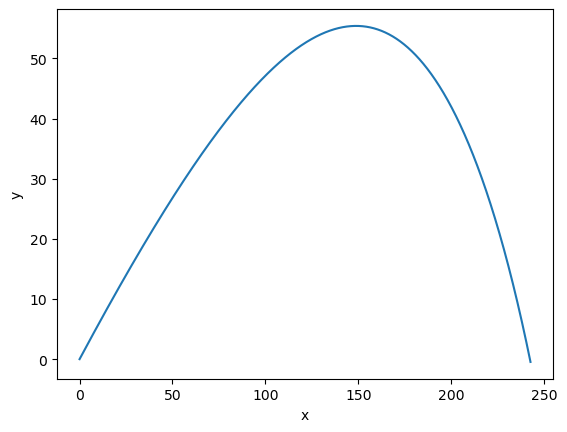

In [75]:
a, b = 0, 6.6
N = 10000
h = (b-a)/N
t = arange(a, b, h)
x, y, vx, vy = [], [], [], []
theta = pi/6
V = 100
r = array([0, 0, V*cos(theta), V*sin(theta)], float)

for i in t:
    x.append(r[0])
    y.append(r[1])
    vx.append(r[2])
    vy.append(r[3])
    r = rk4(i, r)
    
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [74]:
## c)
x_final = x[N-1]
print("Posição final: %.2f"%x_final)

Posição final: 242.64


In [76]:
def f(t, r, m):
    x, y, vx, vy = r[0], r[1], r[2], r[3]
    
    fx = vx
    fy = vy
    m2 = 2*m
    fvx = ((-(pi*(R**2)*p*C))/m2)*vx*sqrt(vx**2 + vy**2)
    fvy = -g-(((pi*(R**2)*p*C)/m2)*vy*sqrt(vx**2 + vy**2))
    return array([fx, fy, fvx, fvy], float)

def rk4(t, r, m):
    K1 = h*f(t, r, m)
    K2 = h*f(t + h/2, r + K1/2, m)
    K3 = h*f(t + h/2, r + K2/2,m) 
    K4 = h*f(t + h, r + K3, m)
    return r + (K1 + 2*K2 + 2*K3 + K4)/6

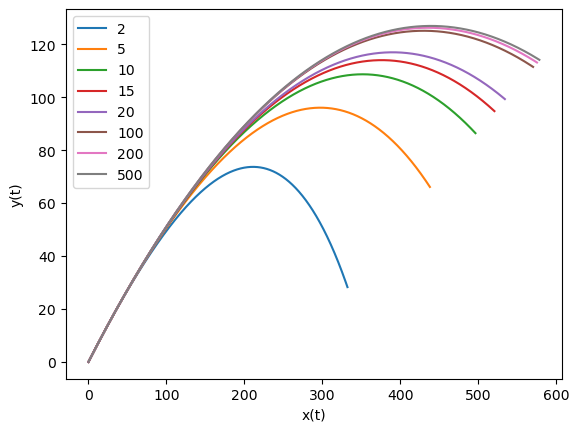

In [78]:
a, b = 0, 6.7
N = 10000
h = (b-a)/N
t = arange(a, b, h)
massa = [2, 5, 10, 15, 20, 100, 200, 500]
theta = pi/6
V = 100

for j in massa:
    x, y, vx, vy = [], [], [], []
    r = array([0, 0, V*cos(theta), V*sin(theta)], float)
    for i in t:
        
        x.append(r[0])
        y.append(r[1])
        vx.append(r[2])
        vy.append(r[3])
        r = rk4(i, r, j)
    
    plt.plot(x,y, label = j)
plt.xlabel("x(t)")
plt.ylabel("y(t)")
plt.legend()
plt.show()        


Variando as massas podemos ver claramente a mudança na trajetória e tempo de voo. É possível ver que a massa é inversamente proporcional a aceleração, como mostrada nas equações.